## ModAL learning notes, example 1
### Notes are written as comments

In [1]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n_initial = 100

In [3]:
# X is the image data, a list of list, each element is a 8*8 grids with 
# color value for each cell. 
# y is the actual number of the handwriting image 
X, y = load_digits(return_X_y=True)

In [4]:
# split the dataset into training part and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# randomly selected 100 samples from X_train, the indces of X_train
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

In [6]:
# Get the selected 100 samples from X train and y train
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

In [7]:
# Get rid of the 100 selected samples from the dataset to form the pool
# we are stimulating that there is a unlabled dataset which contains 1247 
# elements, so the deleted 100 elements will be used as the training dataset
# and the rest of elements in X_train will became the X_pool which we pretend 
# has no label assigned. 
# Thus, we train the model with the a small dataset, and let the learner 
# actively learning through query the most uncertain samples from the pool
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [8]:
# The unlabeled dataset now contains 1247 elements
len(X_pool)

1247

In [9]:
# The labeled dataset now contains 100 elements, these are the indexs refering
# to the actual data points. 
len(X_initial)

100

In [10]:
# init a learner. 
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [11]:
# number of queries we want to have 
n_queries = 20

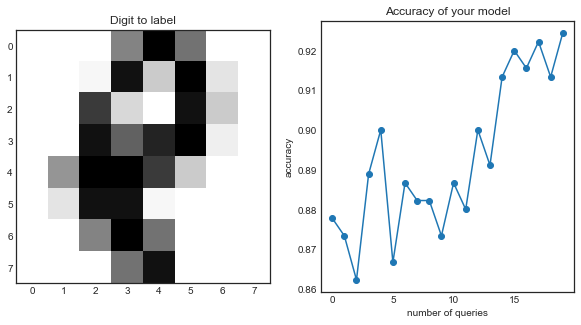

Which digit is this?
[8]
8


In [12]:
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    # get the one that need to query, the one learner feels uncertain 
    query_idx, query_inst = learner.query(X_pool) 
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    print(y_pool[query_idx])
    y_new = np.array([int(input())], dtype=int)
    # Teach the model
    learner.teach(query_inst.reshape(1, -1), y_new)
    # removed the learned sample from the pool
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

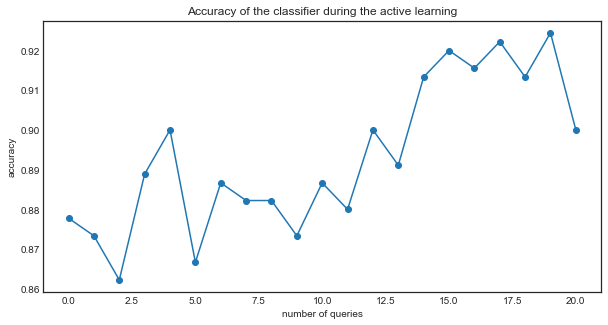

In [13]:

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()